# Visualización y Análisis de Datos - Diabetes Dataset

## Actividad Evaluable: Mapas de calor y boxplots
﻿**A00839729 | Josué Santiago Aguiñaga Cázres | ITC**

En este análisis se estudiarán tres variables del conjunto de datos de diabetes (Pima Indians Diabetes Database).  
Se usarán representaciones gráficas (diagramas de barras, histogramas, boxplots y mapas de calor) para observar sus distribuciones, relaciones y posibles correlaciones.

## Descripción de Variables
- **Pregnancies:** Cuantitativa discreta → número de embarazos.  
- **Glucose:** Cuantitativa continua → concentración de glucosa.  
- **BloodPressure:** Cuantitativa continua → presión diastólica (mm Hg).  
- **SkinThickness:** Cuantitativa continua → grosor del pliegue cutáneo (mm).  
- **Insulin:** Cuantitativa continua → insulina sérica (mu U/ml).  
- **BMI:** Cuantitativa continua → índice de masa corporal.  
- **DiabetesPedigreeFunction:** Cuantitativa continua → función de historial familiar.  
- **Age:** Cuantitativa discreta → edad del paciente (años).  
- **Outcome:** Cualitativa nominal binaria → 1 = positivo a diabetes, 0 = negativo.

In [8]:
# Cargar Datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset
df = pd.read_csv("diabetes.csv")

# Selección de las variables a analizar
vars_analisis = ["DiabetesPedigreeFunction", "Age", "Outcome"]
df_subset = df[vars_analisis]

df_subset.head()

,DiabetesPedigreeFunction,Age,Outcome
0,0.627,50,1
1,0.351,31,0
2,0.672,32,1
3,0.167,21,0
4,2.288,33,1


## Descripción de las variables seleccionadas

- **DiabetesPedigreeFunction (DPF):**  
  Variable cuantitativa continua que representa la influencia genética familiar sobre la probabilidad de desarrollar diabetes.  
  Valores más altos indican mayor riesgo hereditario.

- **Age:**  
  Variable cuantitativa discreta (edad en años). Permite analizar cómo influye la edad en el diagnóstico de diabetes.

- **Outcome:**  
  Variable cualitativa nominal binaria (0 = No diabético, 1 = Diabético).  
  Es la variable objetivo con la cual se comparan las demás.

In [9]:
# Resumen estadístico y valores nulos
df_subset.describe()
df_subset.isnull().sum()

DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Los tres campos no presentan valores nulos.  
Los valores de **Age** van de 21 a 81 años, y los de **DPF** de 0.08 a 2.42, lo que muestra una gran dispersión.  
El 1 en **Outcome** representa aproximadamente el 35% de los casos (personas con diabetes).

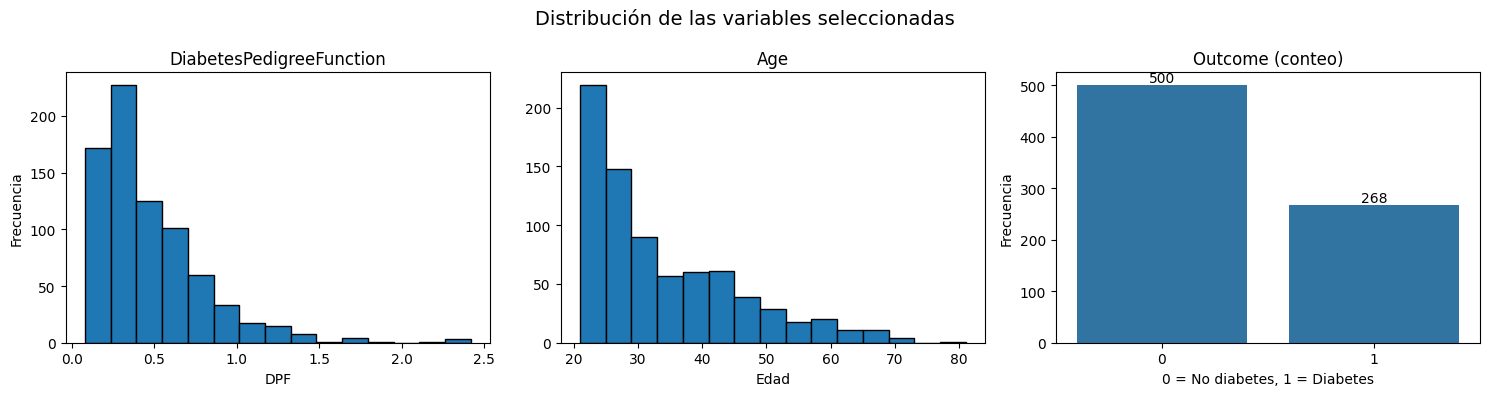

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Hist: DiabetesPedigreeFunction
axes[0].hist(df['DiabetesPedigreeFunction'], bins=15, edgecolor='black')
axes[0].set_title('DiabetesPedigreeFunction')
axes[0].set_xlabel('DPF')
axes[0].set_ylabel('Frecuencia')

# Hist: Age
axes[1].hist(df['Age'], bins=15, edgecolor='black')
axes[1].set_title('Age')
axes[1].set_xlabel('Edad')

# Barras: Outcome (no histograma)
sns.countplot(x='Outcome', data=df, ax=axes[2])
axes[2].set_title('Outcome (conteo)')
axes[2].set_xlabel('0 = No diabetes, 1 = Diabetes')
axes[2].set_ylabel('Frecuencia')

# Etiquetas encima de las barras
for container in axes[2].containers:
    axes[2].bar_label(container)

fig.suptitle('Distribución de las variables seleccionadas', fontsize=14)
plt.tight_layout()
plt.show()

Los histogramas muestran que:
- **Age** tiene una mayor concentración entre los 20 y 40 años.  
- **DPF** presenta muchos valores bajos (menores a 1), con algunos pocos casos altos que podrían considerarse atípicos.  
- **Outcome** está desequilibrado: hay más pacientes sin diabetes (0) que con diabetes (1).

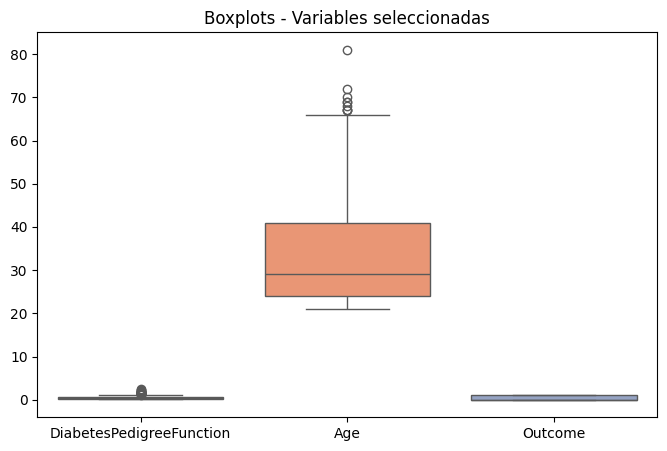

In [11]:
# Boxplots (detección de atípicos)
plt.figure(figsize=(8,5))
sns.boxplot(data=df_subset, palette="Set2")
plt.title("Boxplots - Variables seleccionadas")
plt.show()

El boxplot permite observar valores atípicos en **DiabetesPedigreeFunction** (superiores a 1.5) y en **Age** (mayores de 70 años).  
Estos valores no son errores, pero representan grupos menos comunes dentro de la muestra y pueden influir en los resultados del modelo si no se tratan adecuadamente.

/tmp/ipykernel_604/869185610.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", data=df_subset, palette="pastel")
/tmp/ipykernel_604/869185610.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y="Age", data=df_subset, palette="pastel")


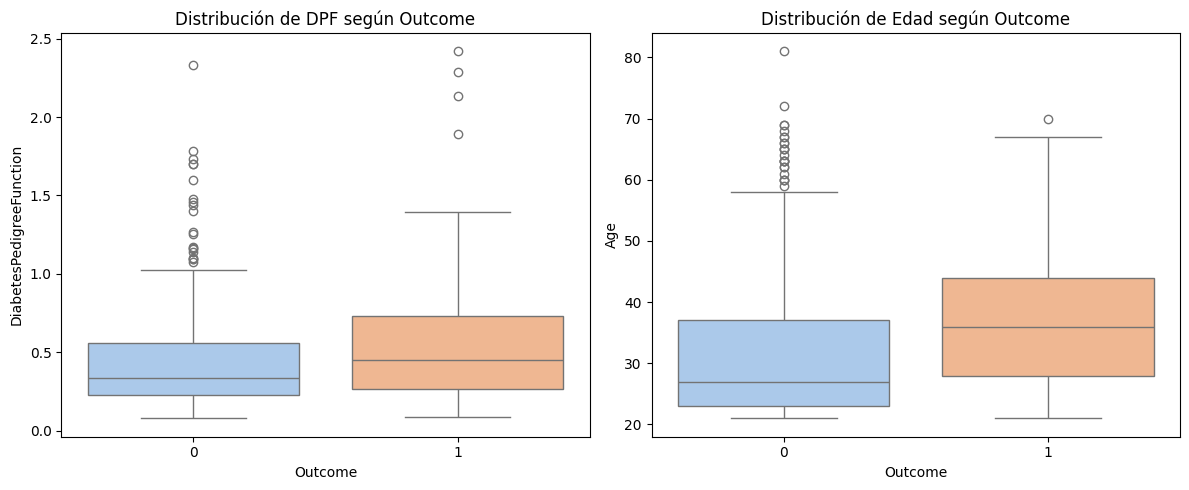

In [12]:
# Distribución por Outcome (barras y densidad)
plt.figure(figsize=(12,5))

# DPF por outcome
plt.subplot(1,2,1)
sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", data=df_subset, palette="pastel")
plt.title("Distribución de DPF según Outcome")

# Edad por outcome
plt.subplot(1,2,2)
sns.boxplot(x="Outcome", y="Age", data=df_subset, palette="pastel")
plt.title("Distribución de Edad según Outcome")

plt.tight_layout()
plt.show()

Las personas diagnosticadas con diabetes (**Outcome = 1**) tienden a tener una **edad promedio mayor** y valores de **DPF** ligeramente más altos.  
Esto sugiere una relación positiva entre la edad, la herencia genética y la probabilidad de desarrollar diabetes.

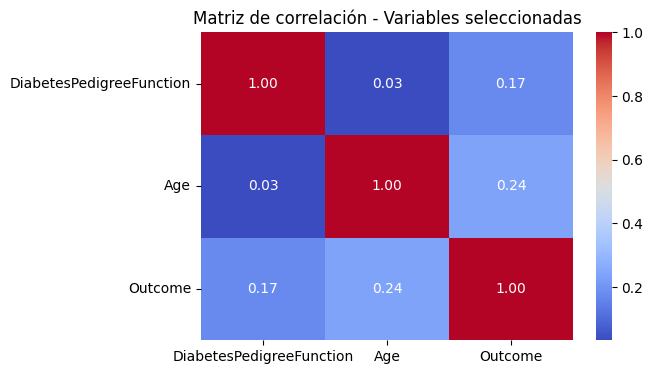

In [13]:
# Mapa de calor (correlaciones)
plt.figure(figsize=(6,4))
sns.heatmap(df_subset.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación - Variables seleccionadas")
plt.show()

El mapa de calor muestra que:
- **Age** y **Outcome** tienen una correlación positiva moderada (~0.24):  
  a mayor edad, mayor probabilidad de ser diabético.  
- **DPF** y **Outcome** tienen una correlación positiva más débil (~0.17):  
  la herencia influye, pero no de forma determinante.
- **Age** y **DPF** casi no se relacionan, lo cual tiene sentido: la edad no depende del historial familiar.

In [14]:
# Rango, min, max, media y mediana
for col in df.columns:
    if df[col].dtype != 'object':
        print(f"📊 {col}")
        print(f"  Min: {df[col].min()}, Max: {df[col].max()}")
        print(f"  Media: {df[col].mean():.2f}, Mediana: {df[col].median():.2f}")
        print("-"*40)

📊 Pregnancies
  Min: 0, Max: 17
  Media: 3.85, Mediana: 3.00
----------------------------------------
📊 Glucose
  Min: 0, Max: 199
  Media: 120.89, Mediana: 117.00
----------------------------------------
📊 BloodPressure
  Min: 0, Max: 122
  Media: 69.11, Mediana: 72.00
----------------------------------------
📊 SkinThickness
  Min: 0, Max: 99
  Media: 20.54, Mediana: 23.00
----------------------------------------
📊 Insulin
  Min: 0, Max: 846
  Media: 79.80, Mediana: 30.50
----------------------------------------
📊 BMI
  Min: 0.0, Max: 67.1
  Media: 31.99, Mediana: 32.00
----------------------------------------
📊 DiabetesPedigreeFunction
  Min: 0.078, Max: 2.42
  Media: 0.47, Mediana: 0.37
----------------------------------------
📊 Age
  Min: 21, Max: 81
  Media: 33.24, Mediana: 29.00
----------------------------------------
📊 Outcome
  Min: 0, Max: 1
  Media: 0.35, Mediana: 0.00
----------------------------------------


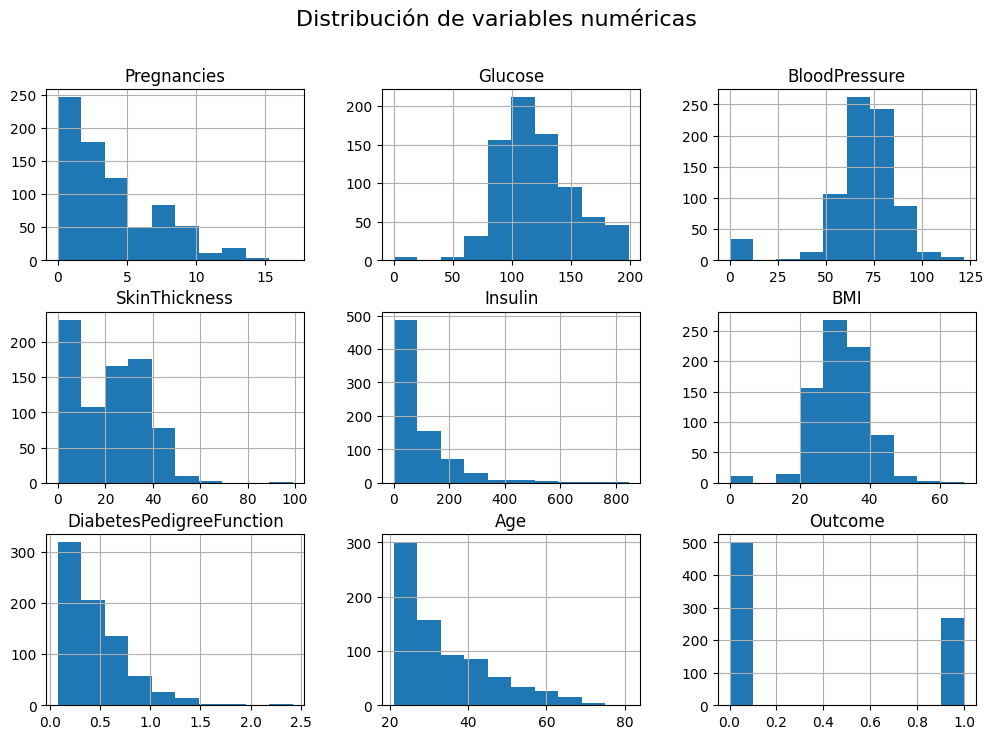

In [15]:
# Andres Martinez Ramos - A00227413
# Histogramas
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(12,8))
plt.suptitle("Distribución de variables numéricas", fontsize=16)
plt.show()

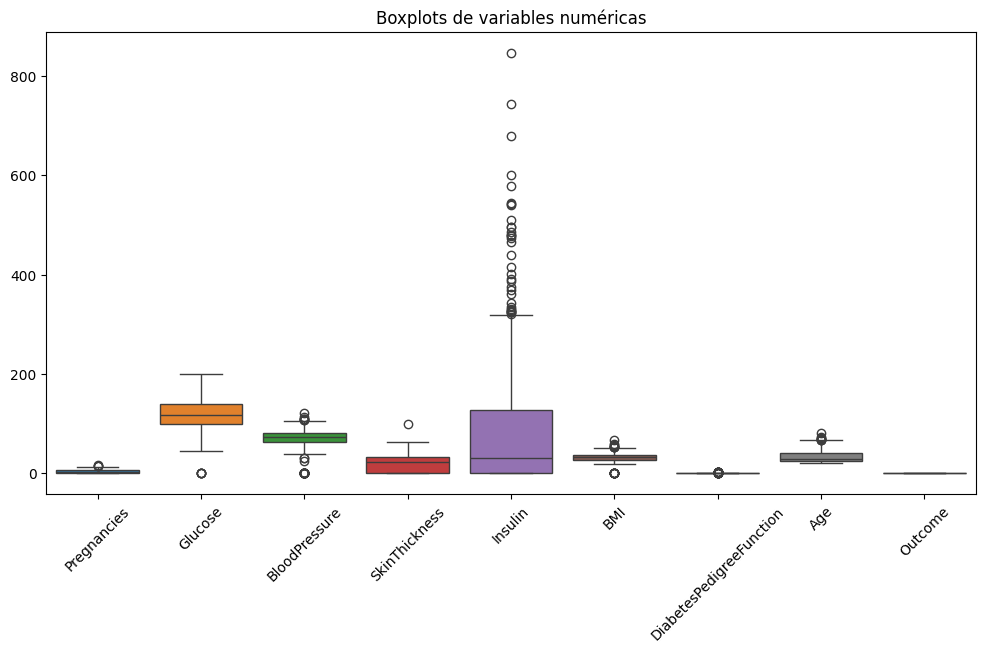

In [16]:
# Andres Martinez Ramos - A00227413
# Boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Boxplots de variables numéricas")
plt.xticks(rotation=45)
plt.show()

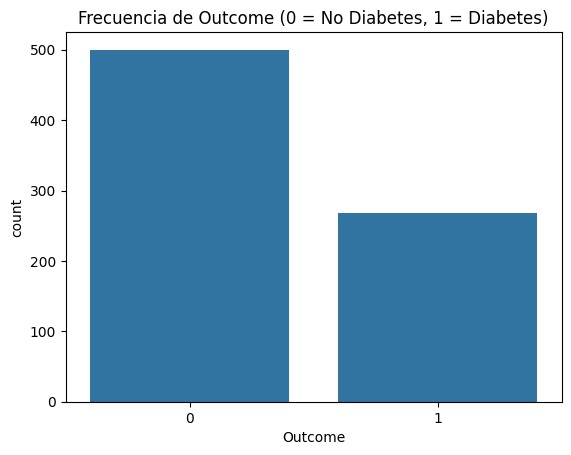

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.30,109.98,68.18,19.66,68.79,30.30,0.43,31.19
1,4.87,141.26,70.82,22.16,100.34,35.14,0.55,37.07


In [17]:
# César Pecero Lara - A00842711 
# Analizar relación con Outcome
sns.countplot(x="Outcome", data=df)
plt.title("Frecuencia de Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.show()

# promedios por grupo de Outcome
df.groupby("Outcome").mean().round(2)

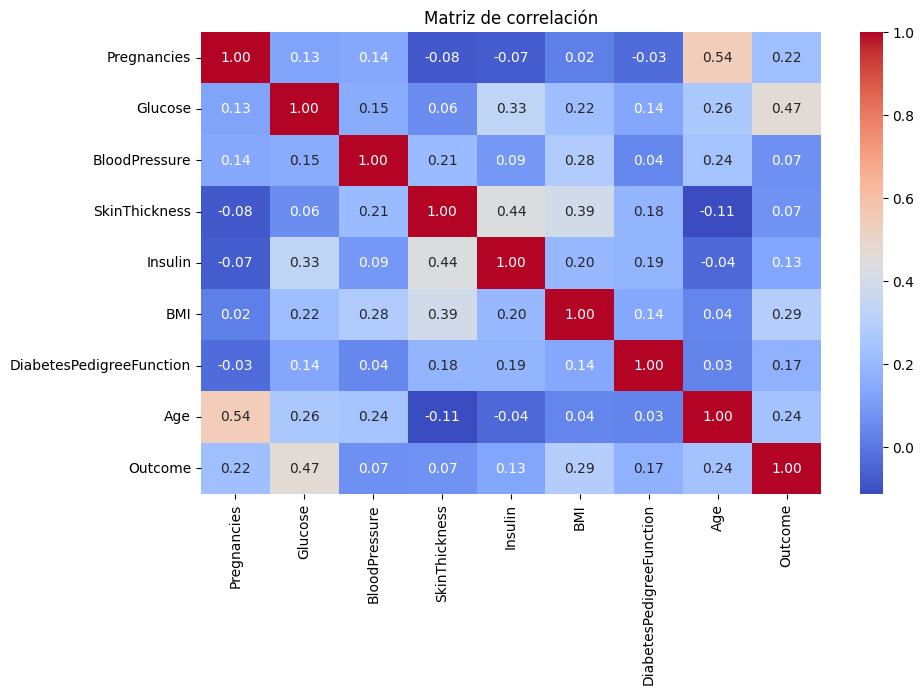

In [18]:
# Comprobación de correlaciones
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

# Conclusión
## Conclusiones

1. **Variables sin información útil:**  
   Ninguna de las tres es redundante; cada una aporta información distinta (edad, herencia y diagnóstico).

2. **Eliminación de variables:**  
   No se eliminarían; sin embargo, *DPF* podría normalizarse o agruparse por rangos debido a su alta dispersión.

3. **Rangos de las variables:**  
   - *Age:* 21–81  
   - *DPF:* 0.08–2.42  
   - *Outcome:* 0–1  
   No están en el mismo rango, por lo que sería recomendable escalar o estandarizar para modelos posteriores.

4. **Datos atípicos:**  
   Se observan valores altos en *DPF* (>1.5) y edades mayores de 70. Son válidos pero representan casos extremos.

5. **Correlación:**  
   - *Age*–*Outcome*: correlación positiva moderada (a más edad, más riesgo).  
   - *DPF*–*Outcome*: correlación positiva débil (la herencia influye ligeramente).  
   En conjunto, ambas variables muestran una relación directa con el diagnóstico de diabetes, aunque con diferente intensidad.

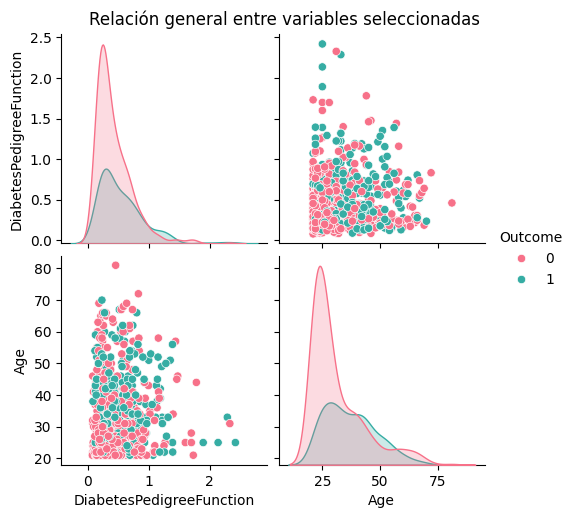

In [21]:
# Combinación visual general
sns.pairplot(df_subset, hue="Outcome", palette="husl")
plt.suptitle("Relación general entre variables seleccionadas", y=1.02)
plt.show()

El parplot confirma que las personas con Outcome = 1 (diabéticas) se concentran en edades mayores y con valores de DPF más altos, reforzando la tendencia observada en los boxplots y mapa de calor.